 # The Impact of the London Ultra-Low Emission Zone Scheme

## Background and project goals
Poor air quality is a huge risk to human health. In London, pollutant levels greatly exceed the World Health Organisation's (WHO) recommendations and contribute to thousands of deaths every year. Policies such as traffic congestion charges (T-charge, ULEZ), have been implemented in recent years to try and address this problem. Reports issued by the Mayor of London have described these traffic schemes as very successful at reducing levels of common pollutants (e.g., NO2 and PM2.5). In this project we investigated whether, despite the official success of the intervention, regions at the border of charge zones have been negatively impacted due to people traveling around the edge of zones to avoid charges. Additionally, we attempted to replicate previous findings demonstrating that the intervention led to an improvement in air quality within the charge zone.


## Methods
To assess the effects of the congestion charges on air quality, we examined the concentration levels of air pollutants, before and after the implementation of intervention. We divided the available air pollution data into three groups: inside, outside and on the ULEZ border.

We focussed on two pollutants heavily associated with transport, NO2 and PM2.5. NO2 is produced primarily by the burning of fuel, and is emitted by cars, trucks and busses, leading to high concentrations of NO2 in locations with heavy traffic. PM2.5 is derived both from natural sources (such as dust and sea salt), and from human-made sources such as particles emitted from vehicle exhausts. It is estimated that half of London’s NO2 pollution and one third of London’s PM pollution is emitted by road transport.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
import scikit_posthocs as sp
from EDA_data_clean import *

In [5]:
#define variables
tc_start_date = datetime.date(year = 2017, month = 10, day = 23) # Date traffic congestion charge was introduced
ulez_start_date = datetime.date(year = 2019, month = 4, day = 8) # Date ULEZ was introduced

# get the name of the pollutant column in the dataframe from the pollutant code
pollutant_to_column = {"NO2": "NO2 (ug/m3)", 
                    'PM10': 'PM10 (ug/m3)',
                    'PM2_5': 'PM2.5 (ug/m3)'}

# Maximum values for NO2 as recommended by WHO 
rec_daily_max = 25 
rec_yearly_max = 10

#load the data
file_path = "./cleaned_data"
# The EDA code can be run on three pollutants: NO2, PM10, PM2.5. There is only limited data available for PM10 and PM2.5
pol_code = "NO2"
all_sites_daily, clean_monthly, clean_pre_averages, clean_post_averages, changes = import_data(pol_code, file_path)

pollutant_column_name = pollutant_to_column[pol_code]

# Exploratory Data Analysis

Air pollution is affected by many factors outside the intervention such as seasonality, weather, and significant events (e.g., COVID-19 related restrictions). This EDA was performed to improve our understanding of the effects of several variables that we predicted would have an important impact.


## Effects on NO2

In [6]:
# Display data types
all_sites_daily.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 137025 entries, 2016-04-08 to 2021-04-08
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Site Indicator  137025 non-null  object 
 1   Weekday         137025 non-null  object 
 2   Site Type       137025 non-null  object 
 3   Location        137025 non-null  object 
 4   Year            137025 non-null  float64
 5   Month           137025 non-null  float64
 6   Day             137025 non-null  float64
 7   Is Weekend      137025 non-null  bool   
 8   NO2 (ug/m3)     92156 non-null   float64
dtypes: bool(1), float64(4), object(4)
memory usage: 9.5+ MB


In [7]:
#Number of sites according to location and site type
df = all_sites_daily.groupby(["Site Indicator", 'Location', 'Site Type']).agg('count').reset_index()
pd.crosstab(df.Location,df['Site Type'],margins = True, margins_name = 'Total' )

Site Type,Industrial,Kerbside,Roadside,Suburban,Urban Background,Total
Location,,,,,,
inside_border,0,4,7,0,3,14
on_border,1,1,4,0,2,8
outside_border,3,4,34,1,11,53
Total,4,9,45,1,16,75


### Time related effects on NO2 levels
Time-related effects on air quality were studied by averaging NO2 concentrations across all monitoring sites, regardless of site location. Below, you can see weekly and seasonal trends in NO2 concentrations: Levels were higher on weekdays than on the weekend and higher during winter months than summer months. 

The horizontal red lines in the figures mark the 

Text(-1, -20, '*Red horizontal line represents the current WHO guideline for maximum recommended daily mean')

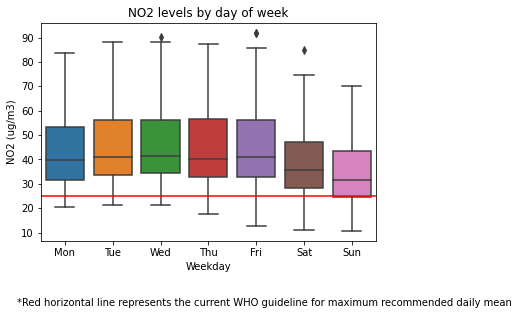

In [34]:
# Daily effects on NO2 levels
# Compute the average NO2 levels for each day of the week for each site
df = all_sites_daily.groupby(["Site Indicator", "Weekday"]).agg("mean").reset_index()
sns.boxplot(x = "Weekday", y=pollutant_column_name, data = df, order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title("NO2 levels by day of week")
plt.axhline(rec_daily_max, color = 'r')
plt.text(-1,-20,'*Red horizontal line represents the current WHO guideline for maximum recommended daily mean')

Text(0.5, 1.0, 'NO2 levels by month')

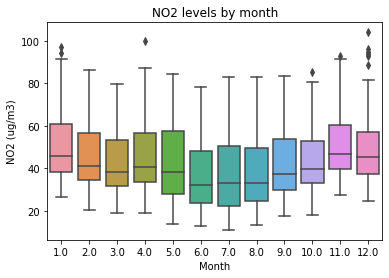

In [29]:
#Monthly effects on NO2 levels
df = clean_monthly.groupby(["Site Indicator", "Month"]).agg("mean").reset_index()
sns.boxplot(x = "Month", y=pollutant_column_name, data = df)
plt.title("NO2 levels by month")

Text(-1, -30, '*Red horizontal line illustrates the WHO guideline for mazimum recommended annual mean')

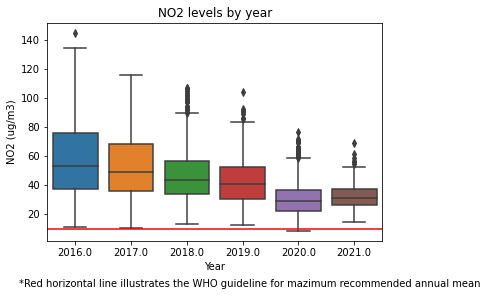

In [33]:
#Year trends
#Compute yearly averages for each site 
df = clean_monthly.groupby(["Site Indicator", "Month", "Year"]).agg("mean").reset_index()
sns.boxplot(x = "Year", y=pollutant_column_name, data =df)
plt.title("NO2 levels by year")
plt.axhline(rec_yearly_max, color = 'r')
plt.text(-1,-30,'*Red horizontal line illustrates the WHO guideline for mazimum recommended annual mean') 

Text(0, 0.5, 'NO2 (ug/m3)')

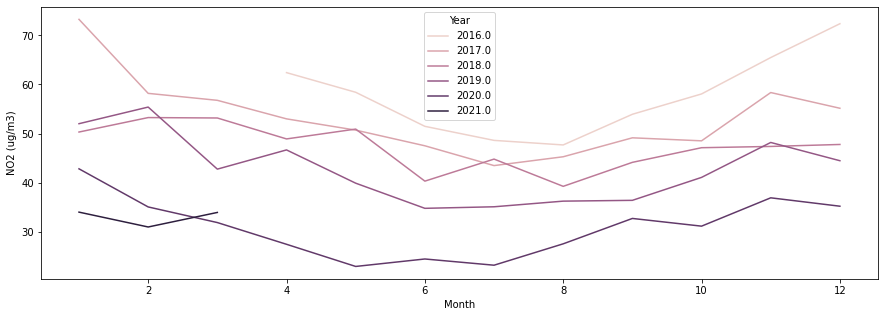

In [8]:
#By month for each year separately
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(ax = ax, data= df, x="Month", y= pollutant_column_name, hue ="Year",  ci = None)
ax.set_xlabel("Month")
ax.set_ylabel('NO2 (ug/m3)')

### Location effects on NO2

In [9]:
#Number of sites according to location and site type
print('number of sites with monthly data by location:')
clean_monthly.groupby('Location').agg("nunique")["Site Indicator"]

number of sites with monthly data by location:


Location
inside_border     11
on_border          8
outside_border    53
Name: Site Indicator, dtype: int64

Examining the average monthly data according to site type (i.e., site location relative to the congestion charge zones) reveals differences in NO2 concentrations between the three site types (NO2 levels outside < border < inside), with a decrease in NO2 concentrations visible over time across all locations. It is interesting to note a large drop in NO2 levels in March 2020, around the time when restrictions were introduced in London during the SARS-CoV-2 pandemic, followed by an upwards trend over time as restrictions were eased.

In [1]:
# Group the data by Location type
df=clean_monthly
df=df.reset_index()
df['MeasurementGMT'] = df['MeasurementGMT'].astype(str)
df['MeasurementGMT']= pd.to_datetime(df['MeasurementGMT'])
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(ax = ax, data=df, x="MeasurementGMT", y=pollutant_column_name, hue ="Location", ci = None) # can make the bars slimmer by adding ci=68
ax.set_xlabel("Time")
ax.set_ylabel(pollutant_column_name)

#add line for t_charge and Ulez
plt.axvline(tc_start_date, color = 'k')
plt.axvline(ulez_start_date, color = 'k')

plt.axhline(rec_daily_max, color = 'r')
plt.axvspan("2017-05","2017-10", facecolor='k', alpha=0.2)
plt.axvspan("2019-05","2019-10", facecolor='k', alpha=0.2)
plt.title("NO2 levels by time and location")

NameError: name 'clean_monthly' is not defined

### Intervention effects on NO2

In [13]:
#Number of sites according to location and site type in final cleaned dataset
df = changes.groupby(["Site Indicator", 'Location', 'Site Type']).agg('count').reset_index()
pd.crosstab(df.Location,df['Site Type'],margins = True, margins_name = 'Total' )

Site Type,Industrial,Kerbside,Roadside,Suburban,Urban Background,Total
Location,,,,,,
inside_border,0,2,3,0,2,7
on_border,1,1,2,0,2,6
outside_border,2,3,18,1,6,30
Total,3,6,23,1,10,43


Text(0.5, 1.0, 'NO2 levels before vs. after intervention')

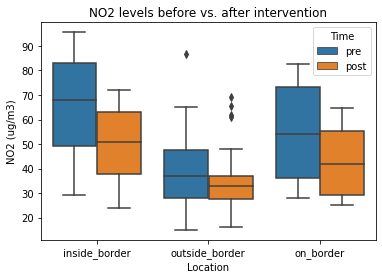

In [14]:
#Pre vs post
yearly_averages = pd.concat([clean_pre_averages.reset_index(), clean_post_averages.reset_index()])
sns.boxplot(x = "Location", y=pollutant_column_name, hue ="Time", data =yearly_averages)
plt.title("NO2 levels before vs. after intervention")

Text(0.5, 1.0, 'Differences in NO2 levels by intervention')

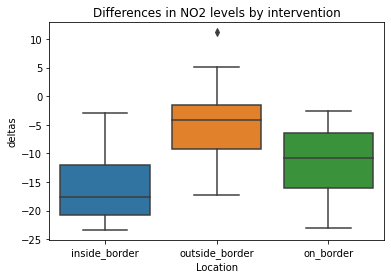

In [15]:
#Plot deltas by location
sns.boxplot(x = "Location", y='deltas', data = changes)
plt.title("Differences in NO2 levels by intervention")


Text(0.5, 1.0, 'Percentage change in NO2 levels by intervention')

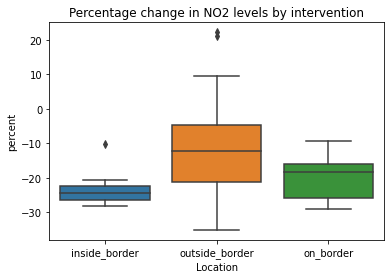

In [16]:
#Plot change in percentage by location
sns.boxplot(x = "Location", y='percent', data = changes)
plt.title("Percentage change in NO2 levels by intervention")

## Statistical tests

In [17]:
# Perform a Kruksall-Wallis comparing size of differences between the locations
delta_inside = changes.loc[changes.Location == 'inside_border','deltas']
delta_outside = changes.loc[changes.Location == 'outside_border', 'deltas']
delta_border = changes.loc[changes.Location == 'on_border', 'deltas']
stat_3group, pval_3group = sci.stats.kruskal(delta_inside, delta_outside, delta_border)

In [18]:
changes

,Site Indicator,Location,Site Type,NO2 (ug/m3),NO2 (ug/m3)_post,deltas,percent
0,BL0,inside_border,Urban Background,31.683530,23.885207,-7.798322,-24.613174
1,BT5,outside_border,Industrial,35.642602,32.729060,-2.913542,-8.174325
2,BT6,outside_border,Roadside,36.829901,30.100866,-6.729036,-18.270577
3,CD1,outside_border,Kerbside,47.383240,36.752767,-10.630473,-22.435091
4,CD9,on_border,Roadside,78.658534,64.824149,-13.834385,-17.587901
5,CT3,on_border,Urban Background,31.067440,25.067061,-6.000379,-19.314045
6,CT4,inside_border,Roadside,79.785499,57.283028,-22.502471,-28.203710
7,CT6,inside_border,Roadside,86.192833,68.503367,-17.689467,-20.523129
8,EA6,outside_border,Roadside,64.957930,61.044125,-3.913805,-6.025139
9,EA8,outside_border,Industrial,38.845739,36.504058,-2.341681,-6.028153


In [19]:
changes.loc[changes.Location == 'inside_border','percent'].mean()

-22.89220524101636

In [20]:
if pval_3group < .05:
    print('There is a significant difference between the groups')
print('the test statistic is:', stat_3group)
print('p =', pval_3group)

There is a significant difference between the groups
the test statistic is: 11.749078828148583
p = 0.0028100881835734187


In [21]:
#Since we found a significant difference between the groups we can
#run a post hoc Dunn test to look at directional differnces
sp.posthoc_dunn(changes, 'deltas','Location', 'bonferroni' )


,inside_border,on_border,outside_border
inside_border,1.000000,1.000000,0.005283
on_border,1.000000,1.000000,0.158921
outside_border,0.005283,0.158921,1.000000


There is a dignificant difference between the Inside border and the outside border. None of the other comparisons are significant.

### Extras - Examine pollution by site type

Text(0.5, 1.0, 'NO2 levels before intervention in different sity types')

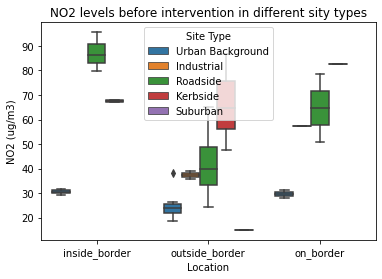

In [22]:
#HPre intervention by location and site type
sns.boxplot(x = "Location", y=pollutant_column_name, hue ="Site Type", data =clean_pre_averages.reset_index())
plt.title("NO2 levels before intervention in different sity types")

Text(0.5, 1.0, 'NO2 levels before vs. after intervention')

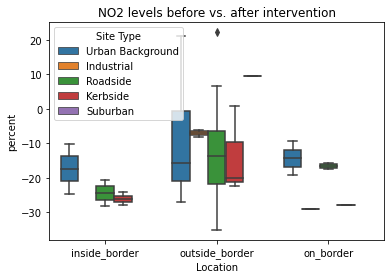

In [23]:
#The change by site type
sns.boxplot(x = "Location", y='percent', hue ='Site Type', data =changes)
plt.title("NO2 levels before vs. after intervention")

# Effects on PM10

In [24]:
#define variables
#load the data
pol_code = "PM10"
all_sites_daily, clean_monthly, clean_pre_averages, clean_post_averages, changes = import_data(pol_code, file_path)

pollutant_column_name = pollutant_to_column[pol_code]

In [25]:
# Display data types
#all_sites_daily.info(verbose=True)

In [26]:
#Number of sites according to location and site type
df = all_sites_daily.groupby(["Site Indicator", 'Location', 'Site Type']).agg('count').reset_index()
pd.crosstab(df.Location,df['Site Type'],margins = True, margins_name = 'Total' )

Site Type,Industrial,Kerbside,Roadside,Suburban,Urban Background,Total
Location,,,,,,
inside_border,0,2,5,0,2,9
on_border,1,2,3,0,2,8
outside_border,5,4,25,1,10,45
Total,6,8,33,1,14,62


Text(0.5, 1.0, 'Pollutant levels by day of week')

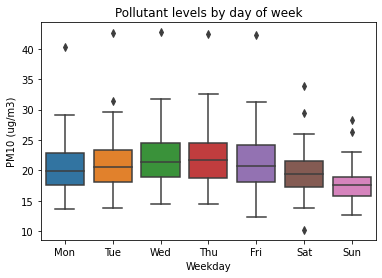

In [27]:
# Daily effects on PM10 levels
df = all_sites_daily.groupby(["Site Indicator", "Weekday"]).agg("mean").reset_index()
sns.boxplot(x = "Weekday", y=pollutant_column_name, data = df, order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title("Pollutant levels by day of week")

Text(0.5, 1.0, 'Pollutant levels by month')

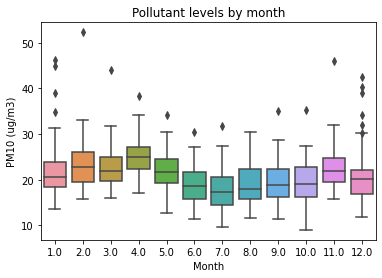

In [28]:
#Monthly effects on PM10 levels
df = clean_monthly.groupby(["Site Indicator", "Month"]).agg("mean").reset_index()
sns.boxplot(x = "Month", y=pollutant_column_name, data = df)
plt.title("Pollutant levels by month")

Text(0.5, 1.0, 'Pollutant levels by year')

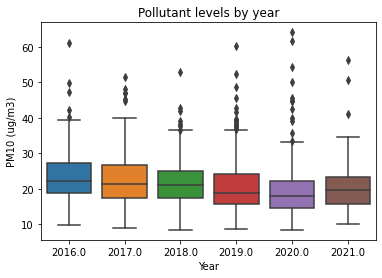

In [29]:
#Year trends
#Compute yearly averages for each site 
df = clean_monthly.groupby(["Site Indicator", "Month", "Year"]).agg("mean").reset_index()
sns.boxplot(x = "Year", y=pollutant_column_name, data =df)
plt.title("Pollutant levels by year")

Text(0, 0.5, 'PM10 (ug/m3)')

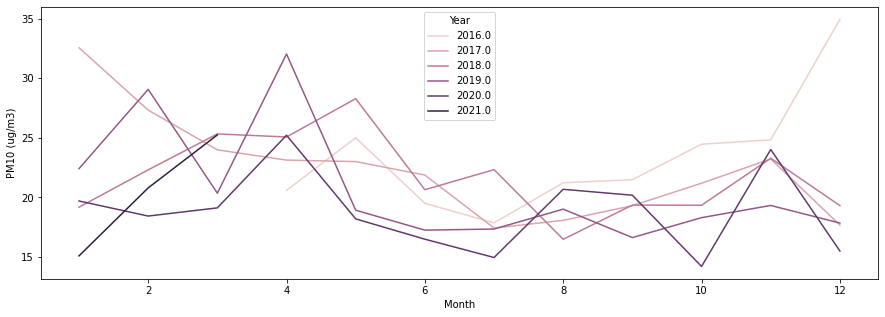

In [30]:
#By month for each year separately
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(ax = ax, data= df, x="Month", y= pollutant_column_name, hue ="Year",  ci = None)
ax.set_xlabel("Month")
ax.set_ylabel(pollutant_column_name)

### Location effects on PM10

In [31]:
#Number of sites according to location and site type
print('number of sites with monthly data by location:')
clean_monthly.groupby('Location').agg("nunique")["Site Indicator"]

number of sites with monthly data by location:


Location
inside_border      7
on_border          8
outside_border    45
Name: Site Indicator, dtype: int64

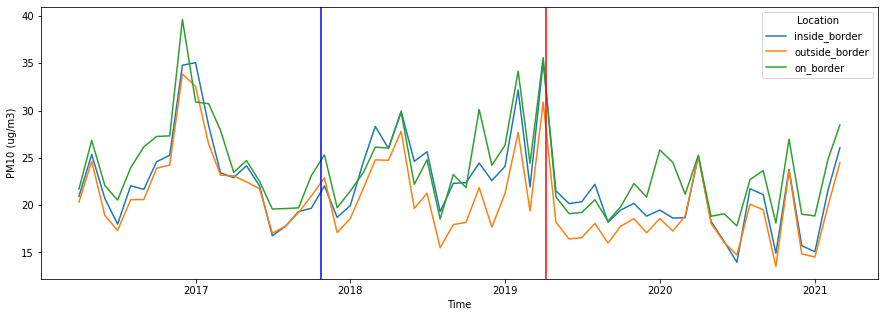

In [32]:
# Group the data by Location type
df=clean_monthly
df=df.reset_index()
df['MeasurementGMT'] = df['MeasurementGMT'].astype(str)
df['MeasurementGMT']= pd.to_datetime(df['MeasurementGMT'])
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(ax = ax, data=df, x="MeasurementGMT", y=pollutant_column_name, hue ="Location", ci = None) # can make the bars slimmer by adding ci=68
ax.set_xlabel("Time")
ax.set_ylabel(pollutant_column_name)

#add line for t_charge and Ulez
plt.axvline(tc_start_date, color = 'b')
plt.axvline(ulez_start_date, color = 'r')

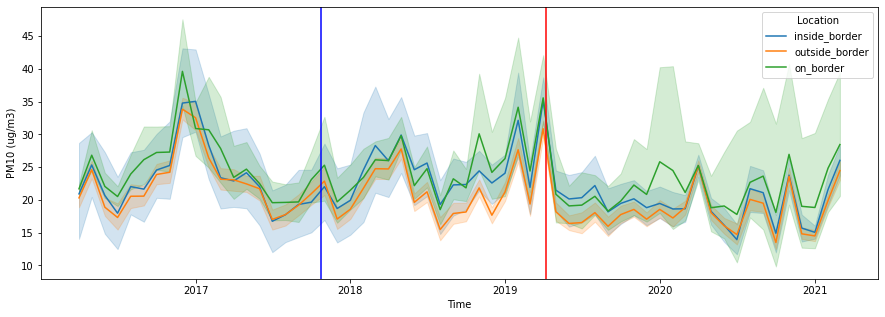

In [33]:
# Group the data by Location type
df=clean_monthly
df=df.reset_index()
df['MeasurementGMT'] = df['MeasurementGMT'].astype(str)
df['MeasurementGMT']= pd.to_datetime(df['MeasurementGMT'])
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(ax = ax, data=df, x="MeasurementGMT", y=pollutant_column_name, hue ="Location") # can make the bars slimmer by adding ci=68
ax.set_xlabel("Time")
ax.set_ylabel(pollutant_column_name)

#add line for t_charge and Ulez
plt.axvline(tc_start_date, color = 'b')
plt.axvline(ulez_start_date, color = 'r')

### Intervention effects on PM10

Location
inside_border      4
on_border          6
outside_border    27
Name: Site Indicator, dtype: int64

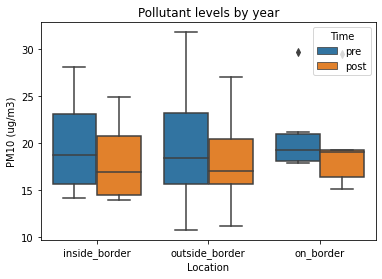

In [34]:
#Pre vs post
yearly_averages = pd.concat([clean_pre_averages.reset_index(), clean_post_averages.reset_index()])

sns.boxplot(x = "Location", y=pollutant_column_name, hue ="Time", data =yearly_averages)
plt.title("Pollutant levels by year")

#Print number of sites in each location
yearly_averages.groupby('Location').agg("nunique")["Site Indicator"]

Text(0.5, 1.0, 'Differences in pollutant levels by year')

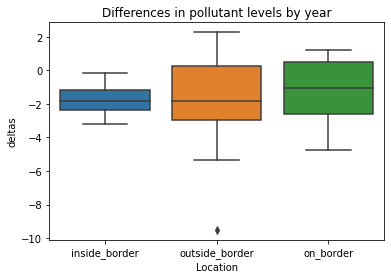

In [35]:
#Plot deltas by location
sns.boxplot(x = "Location", y='deltas', data =changes)
plt.title("Differences in pollutant levels by year")


## Statistical tests

In [36]:
# Perform a Kruksall-Wallis comparing size of differences between the locations
delta_inside = changes.loc[changes.Location == 'inside_border','deltas']
delta_outside = changes.loc[changes.Location == 'outside_border', 'deltas']
delta_border = changes.loc[changes.Location == 'on_border', 'deltas']
stat_3group, pval_3group = sci.stats.kruskal(delta_inside, delta_outside, delta_border)

In [37]:
print(pval_3group)
print(stat_3group)

0.9249287560886221
0.1560771297613428


## Effects on PM2.5

In [38]:
#define variables
#load the data
pol_code = "PM2_5"
all_sites_daily, clean_monthly, clean_pre_averages, clean_post_averages, changes = import_data(pol_code, file_path)

pollutant_column_name = pollutant_to_column[pol_code]

In [39]:
# Display data types
#all_sites_daily.info(verbose=True)

In [40]:
#Number of sites according to location and site type
df = all_sites_daily.groupby(["Site Indicator", 'Location', 'Site Type']).agg('count').reset_index()
pd.crosstab(df.Location,df['Site Type'],margins = True, margins_name = 'Total' )

Site Type,Industrial,Kerbside,Roadside,Urban Background,Total
Location,,,,,
inside_border,0,1,0,2,3
on_border,0,1,2,2,5
outside_border,1,1,12,5,19
Total,1,3,14,9,27


Text(0.5, 1.0, 'Pollutant levels by day of week')

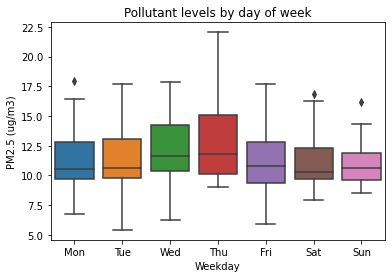

In [41]:
# Daily effects on PM2.5 levels
# Compute the average NO2 levels for each day of the week for each site
df = all_sites_daily.groupby(["Site Indicator", "Weekday"]).agg("mean").reset_index()
sns.boxplot(x = "Weekday", y=pollutant_column_name, data = df, order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title("Pollutant levels by day of week")

Text(0.5, 1.0, 'Pollutant levels by month')

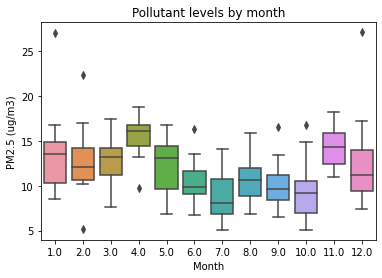

In [42]:
#Monthly effects on PM2.5 levels
df = clean_monthly.groupby(["Site Indicator", "Month"]).agg("mean").reset_index()
sns.boxplot(x = "Month", y=pollutant_column_name, data = df)
plt.title("Pollutant levels by month")

Text(0.5, 1.0, 'Pollutant levels by year')

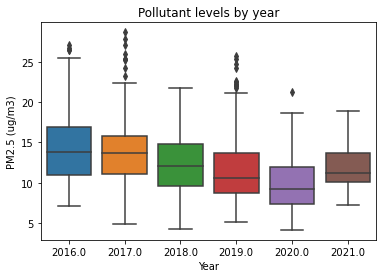

In [43]:
#Year trends
#Compute yearly averages for each site 
df = clean_monthly.groupby(["Site Indicator", "Month", "Year"]).agg("mean").reset_index()
sns.boxplot(x = "Year", y=pollutant_column_name, data =df)
plt.title("Pollutant levels by year")

Text(0, 0.5, 'PM2.5 (ug/m3)')

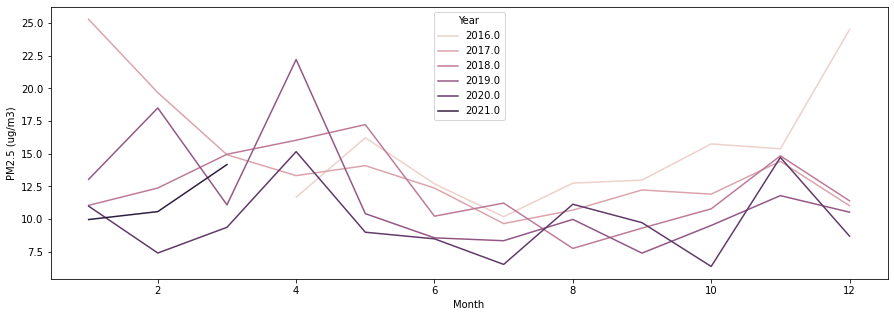

In [44]:
#By month for each year separately
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(ax = ax, data= df, x="Month", y= pollutant_column_name, hue ="Year",  ci = None)
ax.set_xlabel("Month")
ax.set_ylabel(pollutant_column_name)

### Location effects on PM2.5

In [45]:
#Number of sites according to location and site type
print('number of sites with monthly data by location:')
clean_monthly.groupby('Location').agg("nunique")["Site Indicator"]

number of sites with monthly data by location:


Location
inside_border      3
on_border          5
outside_border    15
Name: Site Indicator, dtype: int64

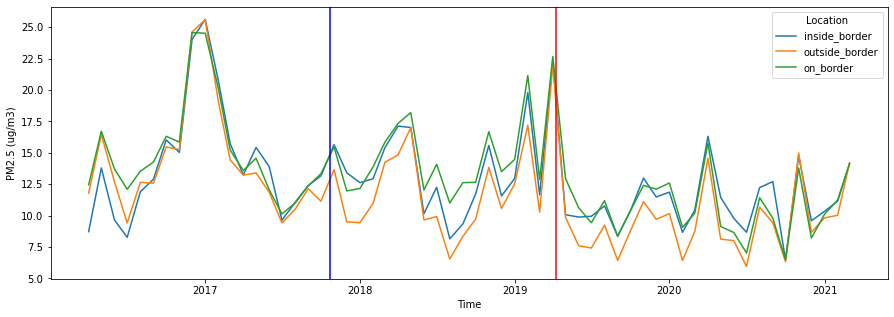

In [46]:
# Group the data by Location type
df=clean_monthly
df=df.reset_index()
df['MeasurementGMT'] = df['MeasurementGMT'].astype(str)
df['MeasurementGMT']= pd.to_datetime(df['MeasurementGMT'])
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(ax = ax, data=df, x="MeasurementGMT", y=pollutant_column_name, hue ="Location", ci = None) # can make the bars slimmer by adding ci=68
ax.set_xlabel("Time")
ax.set_ylabel(pollutant_column_name)

#add line for t_charge and Ulez
plt.axvline(tc_start_date, color = 'b')
plt.axvline(ulez_start_date, color = 'r')

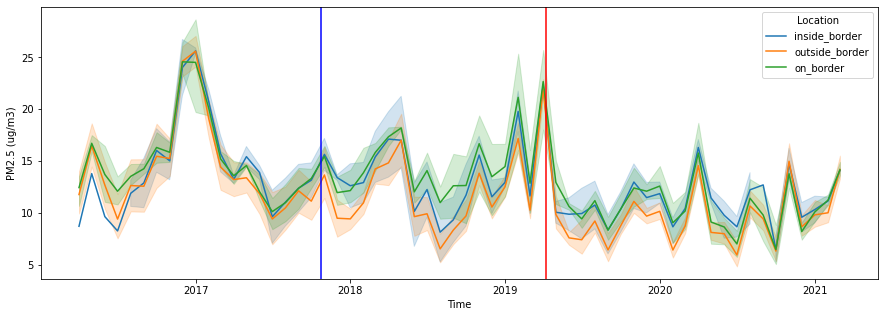

In [47]:
# Group the data by Location type
df=clean_monthly
df=df.reset_index()
df['MeasurementGMT'] = df['MeasurementGMT'].astype(str)
df['MeasurementGMT']= pd.to_datetime(df['MeasurementGMT'])
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(ax = ax, data=df, x="MeasurementGMT", y=pollutant_column_name, hue ="Location") # can make the bars slimmer by adding ci=68
ax.set_xlabel("Time")
ax.set_ylabel(pollutant_column_name)

#add line for t_charge and Ulez
plt.axvline(tc_start_date, color = 'b')
plt.axvline(ulez_start_date, color = 'r')

### Intervention effects on PM2.5

Location
inside_border     2
on_border         2
outside_border    5
Name: Site Indicator, dtype: int64

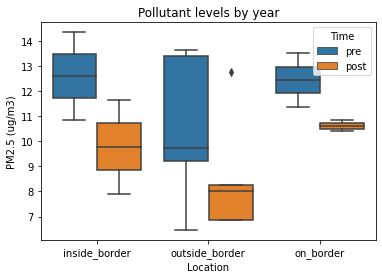

In [48]:
#Pre vs post
yearly_averages = pd.concat([clean_pre_averages.reset_index(), clean_post_averages.reset_index()])

sns.boxplot(x = "Location", y=pollutant_column_name, hue ="Time", data =yearly_averages)
plt.title("Pollutant levels by year")

#Print number of sites in each location
yearly_averages.groupby('Location').agg("nunique")["Site Indicator"]

Text(0.5, 1.0, 'Differences in pollutant levels by year')

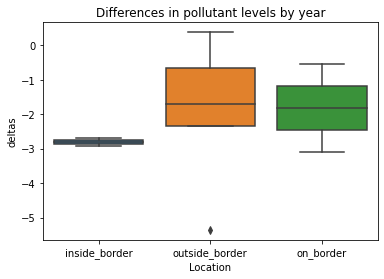

In [49]:
#Plot deltas by location
sns.boxplot(x = "Location", y='deltas', data =changes)
plt.title("Differences in pollutant levels by year")


## Statistical tests

In [50]:
# Perform a Kruksall-Wallis comparing size of differences between the locations
delta_inside = changes.loc[changes.Location == 'inside_border','deltas']
delta_outside = changes.loc[changes.Location == 'outside_border', 'deltas']
delta_border = changes.loc[changes.Location == 'on_border', 'deltas']
stat_3group, pval_3group = sci.stats.kruskal(delta_inside, delta_outside, delta_border)

In [51]:
print(pval_3group)
print(stat_3group)

0.6570468198150569
0.8399999999999999
